# TECH2 Mandatory assignment 2

## About the mandatory assignment

-   The assignment must be completed individually.
-   You are allowed to use all online resources for help, including generative AI. You must include a statement on how you used AI to solve the tasks.
-   After the assignment deadline, you must perform a peer review of two other students' assignment on Canvas. You're not allowed to use AI to write the peer-review for you.
-   Deadline for the assignment: Friday, October 17, 16:00.
-   Deadline for the peer review: Friday, October 24, 16:00.


## Requirements

-   Your solution needs to be uploaded to GitHub. You should fork the assignment repository at
    [https://github.com/richardfoltyn/TECH2-H25-assignment2](https://github.com/richardfoltyn/TECH2-H25-assignment2)
    and add your solution to this notebook.
-   All commits in your repository must be *prior* to the deadline. 
-   You need to make sure that your GitHub repository is publicly accessible. This can be changed in the GitHub repository setttings, if required.
-   You need to submit the URL to the your GitHub repository on Canvas.
-   Make sure your notebook runs without errors (`Restart` and `Run all`). 
-   Your notebook *must* run with the TECH2 environment we've been using in part 2. You can create this environment from the 
    `environment.yml` file in this repository if you haven't done so earlier.


## Tasks

In this assignment, you are asked to analyze a 10% sub-sample of the Survey of Consumer Finances (SCF), a survey of household portfolios that is representative of the US population. The survey was administered every 3 years from 1989 to 2022. The appendix in this document contains a description of the variables present in this data set (this is a subset; the original SCF contains many more variables).

1.  Data preprocessing

    1.  Read the CSV file `SCF_10pct.csv` stored in this repository.
    2.  Keep only observations where the household head is aged between 25 and 89. 
    3.  Create the column `'college'`, which contains an indicator variable that is 1 when the household head has at least some college (column `'educ'` is 3 or 4), and 0 otherwise.
    4.  Divide the values in the column `'networth'` by 1,000 so that they are reported in thousands of US dollars.
    5.  Report the number of observations in the final sample.

2.  In this part, you're asked to analyze how net worth (total gross assets minus total debt) varies across the four education levels (no high school, high school, some college, 4-year college or more):

    1.  Compute the average net worth (in thousands of US dollars) by education (use a loop).
    2.  Create a bar chart that plots the average net worth by education.

3.  In this part, you're asked to analyze how net worth has changed over the last 3 decades:

    1.  Compute the average net worth (in thousands of US dollars) by survey year (use a loop).
    2.  Create a line plot that shows the evolution of average net worth over the years 1989 to 2022.

4.  Finally, combine the analyses from the previous parts to see how net worth evolved over the years for those with and without college.

    1.  Compute the average net worth (in thousands of US dollars) by survey year, separately for non-college (`college=0`) and the college-educated (`college=1`).
    2.  Create a line plot that shows the evolution of net worth over the years 1989 to 2022 by college status, i.e., your figure should contain two lines, one for college and one for non-college.

Remember to add axis labels, titles, and legends (where applicable) to all your figures.


## Hints

-   The assignment can be solved using the concepts we covered up to and including lecture/workshop 3 on Friday, October 10. 
-   In particular, you don't need `groupby()` which we'll cover later in the course, but you can instead loop over education levels or years, as needed.

***
**WRITE YOUR SOLUTION TO PARTS 1-4 HERE**

In [4]:
### Part 1

import pandas as pd
import numpy as np

# Path to the CSV file
DATA_PATH = 'SCF_10pct.csv'

# Read in the data
df = pd.read_csv(DATA_PATH)

# use the DataFrame (df) command to filter rows where the age is between 25 and 89. My program had issues, so AI advised me to use the .copy() method to create an independent copy of the filtered data
age1 = df[(df['age'] >= 25) & (df['age'] <= 89)].copy()

# use of loc and np.where to create a new 'college' column:
# Assign 1 if 'educ' is 3 or 4, otherwise 0.
age1.loc[:, 'college'] = np.where(age1['educ'].isin([3, 4]), 1, 0)

# use of loc to transform 'networth' by dividing values by 1000
age1.loc[:, 'networth'] = age1['networth'] / 1000

n_obs = len(age1)
print(f"Number of observations in final sample: {n_obs}")


Number of observations in final sample: 5471


Average net worth (in thousands USD) by education level:
 educ = 1: 154.41
 educ = 2: 279.35
 educ = 3: 1107.28
 educ = 4: 1677.32


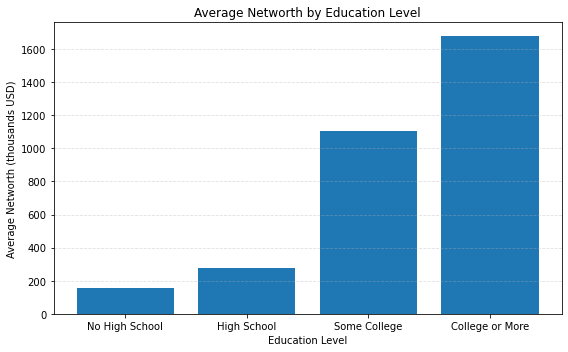

In [7]:
### Part 2

# Use of the sorted() command to arrange unique education levels in a lowest to highest code - use of AI for this command 
education_levels = sorted(age1['educ'].dropna().unique())

import pandas as pd
import matplotlib.pyplot as plt


avg_networth_by_educ = {}
for lvl in education_levels:
# Use of boolean indexing to select only rows for the current education level
    subset = age1[age1['educ'] == lvl]
    mean_val = subset['networth'].mean()  
    avg_networth_by_educ[lvl] = mean_val

# Use of a dictionary to give names to education levels
edu_labels = {
    1: 'No High School',
    2: 'High School',
    3: 'Some College',
    4: 'College or More'
}

# Print results
print("Average net worth (in thousands USD) by education level:")
for lvl, mean_val in avg_networth_by_educ.items():
    print(f" educ = {lvl}: {mean_val:.2f}")

# Use of list() and .keys() to get all numeric education codes from the dictionary - use of AI for the key command 
x_vals = list(edu_labels.keys())
# Use of list comprehension to get the readable education labels corresponding to each code
x_labels = [edu_labels[x] for x in x_vals]

# plt command to create a bar chart 
plt.figure(figsize=(8,5))
plt.bar(x_labels, [avg_networth_by_educ[x] for x in x_vals])
plt.xlabel('Education Level')
plt.ylabel('Average Networth (thousands USD)')
plt.title('Average Networth by Education Level')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Average net worth (in thousands USD) by survey year:
Year 1989: 873.86
Year 1992: 384.14
Year 1995: 487.89
Year 1998: 911.88
Year 2001: 510.17
Year 2004: 725.36
Year 2007: 1471.39
Year 2010: 603.62
Year 2013: 915.59
Year 2016: 890.47
Year 2019: 734.01
Year 2022: 2458.33


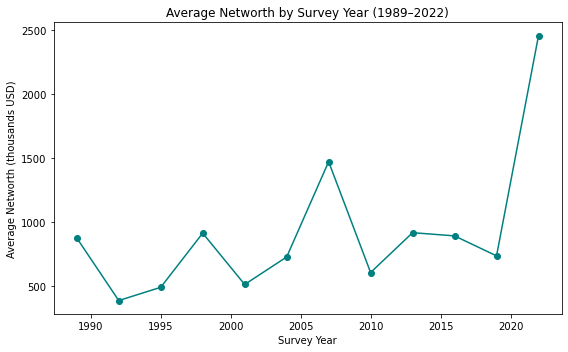

In [10]:
### Part3 

age1_filtered = age1[(age1['year'] >= 1989) & (age1['year'] <= 2022)].copy()

survey_years = sorted(age1_filtered['year'].dropna().unique())

avg_networth_by_year = {}

for yr in survey_years:
    subset = age1_filtered[age1_filtered['year'] == yr]
    mean_val = subset['networth'].mean() 
    avg_networth_by_year[yr] = mean_val

# Print results
print("Average net worth (in thousands USD) by survey year:")
for yr, mean_val in avg_networth_by_year.items():
    print(f"Year {yr}: {mean_val:.2f}")

# Line chart 
plt.figure(figsize=(8,5))
plt.plot(avg_networth_by_year.keys(), avg_networth_by_year.values(), marker='o', color='teal')
plt.xlabel('Survey Year')
plt.ylabel('Average Networth (thousands USD)')
plt.title('Average Networth by Survey Year (1989–2022)')
plt.tight_layout()
plt.show()



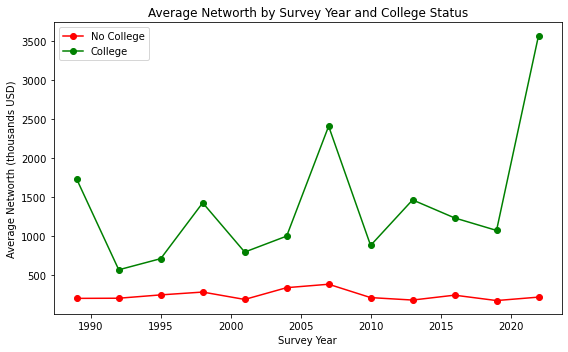

In [12]:
### Part 4

avg_by_year_college0 = []
avg_by_year_college1 = []

for yr in survey_years:
    subset = age1_filtered[age1_filtered['year'] == yr]
# Use of boolean indexing and mean() to find the average net worth, for individuals without a college degree (college == 0)
    mean0 = subset[subset['college'] == 0]['networth'].mean()
 # Same as above, but for individuals with a college degree (college == 1)
    mean1 = subset[subset['college'] == 1]['networth'].mean()
    avg_by_year_college0.append(mean0)
    avg_by_year_college1.append(mean1)


# plotting both lines 
plt.figure(figsize=(8,5))
plt.plot(survey_years, avg_by_year_college0, marker='o', label='No College', color='red')
plt.plot(survey_years, avg_by_year_college1, marker='o', label='College', color='green')
plt.xlabel('Survey Year')
plt.ylabel('Average Networth (thousands USD)')
plt.title('Average Networth by Survey Year and College Status')
plt.legend()
plt.tight_layout()
plt.show()



***
# Data description

## Variables

| Variable         | Description |
|------------------|-------------|
| id               | Identifier  |
| year             | Survey year |
| age             | Age of reference person (household head) |
| educ            | Education of reference person (1 = no high school/GED, 2 = high school or GED, 3 = some college or Assoc. degree, 4 = Bachelors degree or higher)|
| networth        | Net worth in US dollars |

## Reference

- URL: https://www.federalreserve.gov/econres/scfindex.htm
- DOI Identifier: https://doi.org/10.17016/8799
- Creator: Board of Governors of the Federal Reserve Board
- Name: 2022 Survey of Consumer Finances
- Description:
    The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families' balance sheets, pensions, income, and demographic characteristics.
- Publisher: Board of Governors of the Federal Reserve System
- Publication Year: 2023 